In [1]:
import matplotlib.pyplot as plt
import numpy as np

from thermohl import solver


This function aims to plot the 3 conductor temperatures(surface, core, average), ampacity and solar heating through a day.
We can observe that when the solar heating increases, the 3 temperatures of the conductor increase also but the ampacity of the conductor decreases.

In [11]:
def example_solver3t(dic):
    # create solver with ieee power terms and 1t heat equation; other options
    # available are solver.cigre, solver.olla and solver.rte for power terms
    slvr = solver.cigre(dic, heateq="3t")

    # test 1: compute temperature (using transit from dic["I"])
    dtemp = slvr.steady_temperature()

    # test 2 : compute max intensity
    Trep = 50.0
    damp = slvr.steady_intensity(Trep)

    # plot results
    fig, ax = plt.subplots(nrows=3, ncols=1)
    ax[0].plot(slvr.args.hour, dtemp['t_surf'], c='C0', label='Surface Conductor temperature (C)')
    ax[0].plot(slvr.args.hour, dtemp['t_avg'], c='C1', label='average Conductor temperature (C)')
    ax[0].plot(slvr.args.hour, dtemp['t_core'], c='C2', label='Core Conductor temperature (C)')

    ax[0].axhline(Trep, ls="--", c='C1', label="Maximum temperature for ampacity")
    ax[1].plot(slvr.args.hour, slvr.args.I, c='C0', label="Transit (A)")
    ax[1].plot(slvr.args.hour, damp['I'], c='C1', label='Conductor ampacity (A)')
    ax[2].plot(slvr.args.hour, dtemp['P_solar'], label="Solar heating power (W/m)")
    for i in range(3):
        ax[i].grid(True)
        ax[i].legend()
    ax[2].set_xlabel("Hour")
    %matplotlib inline
    plt.show()
    

In [12]:
import matplotlib

matplotlib.use("TkAgg")
plt.close("all")

# Generate input dict (for the sake of simplicity, only a few inputs are
# used, the rest is filled with default values).
dic = dict(
    lat=46.1,
    alt=123.,
    azm=31.,
    month=6,
    day=20,
    hour=np.linspace(0., 23., 24),
    I=np.array([400. for i in range(12)] + [700. for i in range(12)]),
)

rstat_analytic max err is 1.092E+01 in 64 iterations


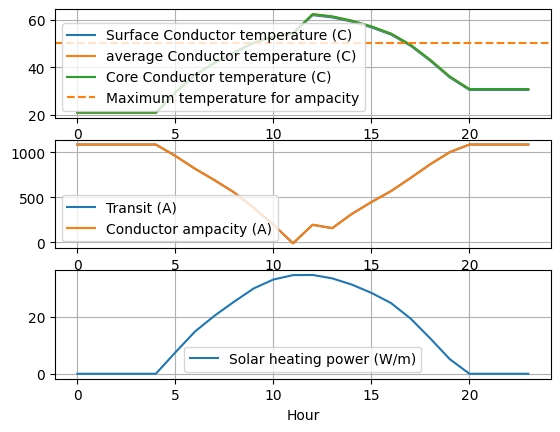

In [13]:
example_solver3t(dic)